In [1]:
import numpy as np
from scipy.stats import norm
from scipy.spatial.distance import cdist
from numpy.random import poisson, lognormal, normal
import seaborn as sns
from skbio.stats.composition import closure, clr
from skbio.stats.ordination import pcoa
from umap import UMAP
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
from sklearn.manifold import TSNE

In [2]:
np.random.seed(724)

In [3]:
def chain_interactions(gradient, mu, sigma):
    xs = [norm.pdf(gradient, loc=mu[i], scale=sigma[i])
          for i in range(len(mu))]
    return np.vstack(xs)

In [4]:
def resample_counts(X, depth, kappa=1):
    mu = depth * closure(X)
    n_samples = len(X)
    new_samples = np.vstack(
        [poisson(lognormal(np.log(mu[i, :]), kappa))
         for i in range(n_samples)
         ]
    )
    return new_samples



In [5]:
g = np.linspace(0, 18)
n_repeats = 100
mu = np.repeat([0, 9, 18], n_repeats)
sig = 4
sigma = np.repeat([sig, sig, sig], n_repeats)
x = chain_interactions(g, mu=mu,
                       sigma=sigma)

In [6]:
cmap = sns.color_palette(as_cmap=True)
lut = dict(zip(set(mu), cmap))
hue = [lut[m] for m in mu]

In [7]:
# kappa = 0.4
kappa = 1.0
x_new = resample_counts(x, 100, kappa=kappa)

In [8]:
x_new_clr = clr(x_new + 1)

dm = cdist(x_new_clr, x_new_clr) #, metric='braycurtis')
PC = pcoa(dm)

p = PC.samples

In [9]:
U = UMAP(
    metric='precomputed',
    n_components=2,
    min_dist=0.5,
    n_neighbors=3,
    random_state=905,
).fit(dm)

T = TSNE(
    metric='precomputed',
).fit(dm)

/home/garmstro/miniconda3/envs/pyro-biome/lib/python3.8/site-packages/umap/umap_.py:1735: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(
/home/garmstro/miniconda3/envs/pyro-biome/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


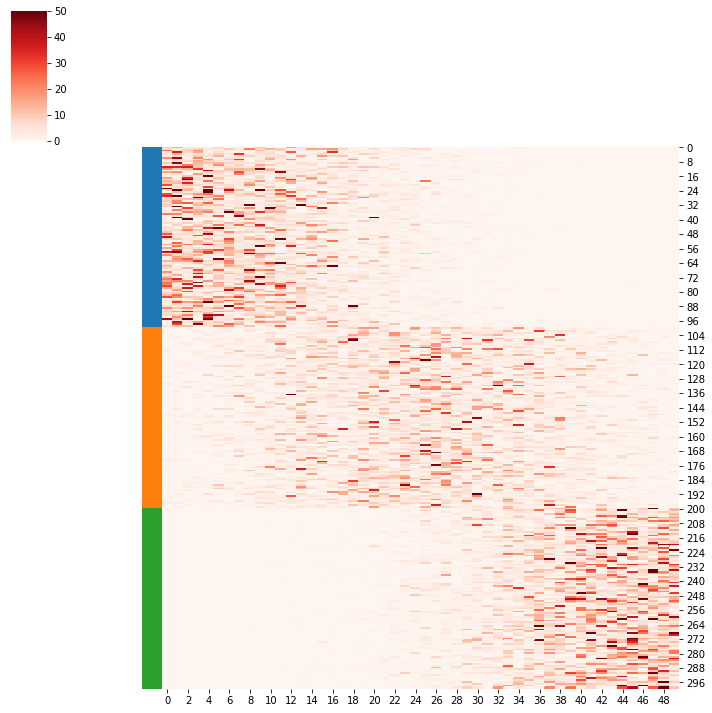

In [10]:
ax = sns.clustermap(
    data=x_new,
    cmap='Reds',
    row_cluster=False,
    col_cluster=False,
    row_colors=hue,
    vmax=50,
)
plt.savefig('results/cluster-heatmap.png')

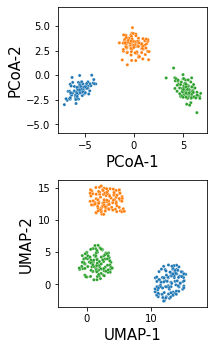

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(3, 5))

g_pc = sns.scatterplot(
    x='PC1',
    y='PC2',
    hue=hue,
    s=10,
    data=p,
    legend=False,
    ax=axs[0],
)
g_pc.set_aspect('equal', 'datalim')
g_pc.set_xlabel('PCoA-1', fontsize=15)
g_pc.set_ylabel('PCoA-2', fontsize=15)

g_umap = sns.scatterplot(
    x=U.embedding_[:, 0],
    y=U.embedding_[:, 1],
    hue=hue,
    s=10,
    legend=False,
    ax=axs[1],
)
g_umap.set_aspect('equal', 'datalim')
g_umap.set_xlabel('UMAP-1', fontsize=15)
g_umap.set_ylabel('UMAP-2', fontsize=15)
plt.tight_layout()

# g_tsne = sns.scatterplot(
#     x=T.embedding_[:, 0],
#     y=T.embedding_[:, 1],
#     hue=hue,
#     legend=False,
#     ax=axs[2],
# )
# g_tsne.set_aspect('equal')
# g_tsne.set_xlabel('TSNE-1', fontsize=15)
# g_tsne.set_ylabel('TSNE-2', fontsize=15)
# plt.tight_layout()

plt.savefig('results/cluster-ordination.png')
plt.show()

In [12]:
n_samples = 100
g = np.linspace(0, n_samples)
kappa = 1.0
mu =  np.linspace(0, n_samples)
sig = 20
sigma = np.repeat(sig, n_repeats)
x = chain_interactions(g, mu=mu,
                       sigma=sigma)


x_new = resample_counts(x, 100, kappa=kappa)

In [13]:
cmap = sns.color_palette("viridis", as_cmap=True)
hue = [to_hex(c) for c in cmap(mu / max(mu))]

In [14]:
x_new_clr = clr(x_new + 1)
dm = cdist(x_new_clr, x_new_clr, metric='euclidean')
PC = pcoa(dm)

p = PC.samples

In [15]:
U = UMAP(
    metric='precomputed',
    n_components=2,
    min_dist=0.5,
    n_neighbors=15,
    random_state=901,
).fit(dm)

/home/garmstro/miniconda3/envs/pyro-biome/lib/python3.8/site-packages/umap/umap_.py:1735: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(


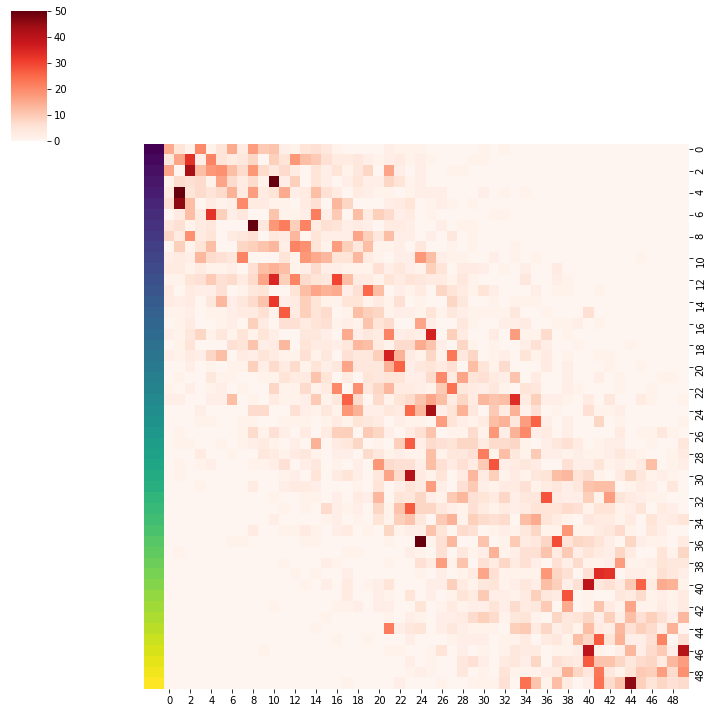

In [16]:
ax = sns.clustermap(
    data=x_new,
    cmap='Reds',
    row_cluster=False,
    col_cluster=False,
    row_colors=hue,
    vmax=50,
)
plt.savefig('results/gradient-heatmap.png')

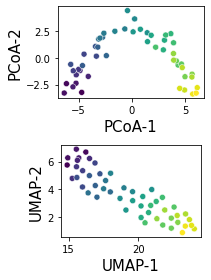

In [17]:
fig, axs = plt.subplots(2, 1)

g_pc = sns.scatterplot(
    x='PC1',
    y='PC2',
    c=hue,
    data=p,
    legend=False,
    ax=axs[0],
)
g_pc.set_aspect('equal')
g_pc.set_xlabel('PCoA-1', fontsize=15)
g_pc.set_ylabel('PCoA-2', fontsize=15)

g_umap = sns.scatterplot(
    x=U.embedding_[:, 0],
    y=U.embedding_[:, 1],
    c=hue,
    legend=False,
    ax=axs[1],
)
g_umap.set_aspect('equal')
g_umap.set_xlabel('UMAP-1', fontsize=15)
g_umap.set_ylabel('UMAP-2', fontsize=15)

# g_tsne = sns.scatterplot(
#     x=T.embedding_[:, 0],
#     y=T.embedding_[:, 1],
#     c=hue,
#     legend=False,
#     ax=axs[2],
# )
# g_tsne.set_aspect('equal')
# g_tsne.set_xlabel('TSNE-1', fontsize=15)
# g_tsne.set_ylabel('TSNE-2', fontsize=15)

plt.tight_layout()

plt.savefig('results/gradient-ordination')
plt.show()

In [18]:
n_samples = 600
g = np.linspace(0, n_samples, n_samples)
kappa = 0.5
mu =  np.linspace(0, n_samples, n_samples)
sig = 100
sigma = np.repeat(sig, n_samples)
x = chain_interactions(g, mu=mu,
                       sigma=sigma)


x_new = resample_counts(x, 100, kappa=kappa)

In [19]:
cmap = sns.color_palette("viridis", as_cmap=True)
hue = [to_hex(c) for c in cmap(mu / max(mu))]

In [20]:
dm = cdist(x_new, x_new, metric='braycurtis')
PC = pcoa(dm)

p = PC.samples

/home/garmstro/miniconda3/envs/pyro-biome/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.2980956334317105 and the largest is 44.03649713454723.
  warn(


In [21]:
U = UMAP(
    metric='precomputed',
    n_components=2,
    min_dist=1,
    n_neighbors=15,
).fit(dm)

T = TSNE(
    metric='precomputed',
    perplexity=15,
).fit(dm)

/home/garmstro/miniconda3/envs/pyro-biome/lib/python3.8/site-packages/umap/umap_.py:1735: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(
/home/garmstro/miniconda3/envs/pyro-biome/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


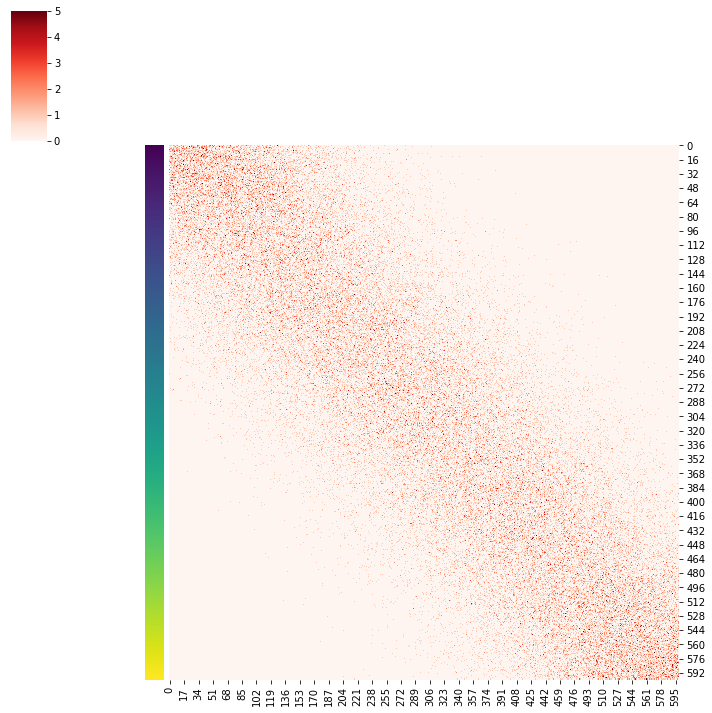

In [22]:
ax = sns.clustermap(
    data=x_new,
    cmap='Reds',
    row_cluster=False,
    col_cluster=False,
    row_colors=hue,
    vmax=5,
)
plt.savefig('results/wobbly-gradient-heatmap.png')

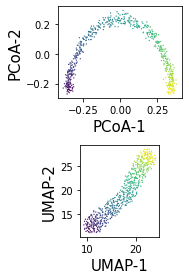

In [23]:
fig, axs = plt.subplots(2, 1)

g_pc = sns.scatterplot(
    x='PC1',
    y='PC2',
    c=hue,
    data=p,
    s=1.7,
    linewidth=0.01,
    legend=False,
    ax=axs[0],
)
g_pc.set_aspect('equal')
g_pc.set_xlabel('PCoA-1', fontsize=15)
g_pc.set_ylabel('PCoA-2', fontsize=15)

g_umap = sns.scatterplot(
    x=U.embedding_[:, 0],
    y=U.embedding_[:, 1],
    c=hue,
    s=1.7,
    linewidth=0.01,
    legend=False,
    ax=axs[1],
)
g_umap.set_aspect('equal')
g_umap.set_xlabel('UMAP-1', fontsize=15)
g_umap.set_ylabel('UMAP-2', fontsize=15)

# g_tsne = sns.scatterplot(
#     x=T.embedding_[:, 0],
#     y=T.embedding_[:, 1],
#     c=hue,
#     legend=False,
#     ax=axs[2],
#     s=0.7,
#     linewidth=0.01,
# )
# g_tsne.set_aspect('equal')
# g_tsne.set_xlabel('TSNE-1', fontsize=15)
# g_tsne.set_ylabel('TSNE-2', fontsize=15)

plt.tight_layout()

plt.savefig('results/wobbly-gradient-ordination')
plt.show()